# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import itertools
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set_theme(style="white", font_scale=0.8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Download data

In [2]:
id='11QMHW8eeJUMyrmK7WEzWZxuIRlJiNsp1'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('uber_lyft.csv')

# Read data

In [3]:
cab_data = pd.read_csv('uber_lyft.csv', index_col=0)

In [4]:
cab_data.shape

(693071, 56)

In [5]:
cab_data.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Fix data types

In [6]:
cab_data['datetime'] = pd.to_datetime(cab_data['datetime'], infer_datetime_format=True)
cab_data['dayOfWeek'] = cab_data['datetime'].dt.day_name()
cab_data['timestamp'] = pd.to_datetime(cab_data['timestamp'], unit='s')
cab_data['apparentTemperatureHighTime'] = pd.to_datetime(cab_data['apparentTemperatureHighTime'], unit='s')
cab_data['apparentTemperatureLowTime'] = pd.to_datetime(cab_data['apparentTemperatureLowTime'], unit='s')
cab_data['apparentTemperatureMinTime'] = pd.to_datetime(cab_data['apparentTemperatureMinTime'], unit='s')
cab_data['apparentTemperatureMaxTime'] = pd.to_datetime(cab_data['apparentTemperatureMaxTime'], unit='s')
cab_data['temperatureLowTime'] = pd.to_datetime(cab_data['temperatureLowTime'], unit='s')
cab_data['temperatureHighTime'] = pd.to_datetime(cab_data['temperatureHighTime'], unit='s')
cab_data['uvIndexTime'] = pd.to_datetime(cab_data['uvIndexTime'], unit='s')
cab_data['temperatureMinTime'] = pd.to_datetime(cab_data['temperatureMinTime'], unit='s')
cab_data['temperatureMaxTime'] = pd.to_datetime(cab_data['temperatureMaxTime'], unit='s')
cab_data['sunriseTime'] = pd.to_datetime(cab_data['sunriseTime'], unit='s')
cab_data['sunsetTime'] = pd.to_datetime(cab_data['sunsetTime'], unit='s')
cab_data['windGustTime'] = pd.to_datetime(cab_data['windGustTime'], unit='s')

In [7]:
cab_data['apparentTemperatureHighTime'] = np.abs((cab_data['datetime'] - cab_data['apparentTemperatureHighTime']).astype('timedelta64[h]'))
cab_data['apparentTemperatureLowTime'] = np.abs((cab_data['datetime'] - cab_data['apparentTemperatureLowTime']).astype('timedelta64[h]'))
cab_data['apparentTemperatureMinTime'] = np.abs((cab_data['datetime'] - cab_data['apparentTemperatureMinTime']).astype('timedelta64[h]'))
cab_data['apparentTemperatureMaxTime'] = np.abs((cab_data['datetime'] - cab_data['apparentTemperatureMaxTime']).astype('timedelta64[h]'))
cab_data['temperatureLowTime'] = np.abs((cab_data['datetime'] - cab_data['temperatureLowTime']).astype('timedelta64[h]'))
cab_data['temperatureHighTime'] = np.abs((cab_data['datetime'] - cab_data['temperatureHighTime']).astype('timedelta64[h]'))
cab_data['temperatureMinTime'] = np.abs((cab_data['datetime'] - cab_data['temperatureMinTime']).astype('timedelta64[h]'))
cab_data['temperatureMaxTime'] = np.abs((cab_data['datetime'] - cab_data['temperatureMaxTime']).astype('timedelta64[h]'))
cab_data['sunriseTime'] = np.abs((cab_data['datetime'] - cab_data['sunriseTime']).astype('timedelta64[h]'))
cab_data['sunsetTime'] = np.abs((cab_data['datetime'] - cab_data['sunsetTime']).astype('timedelta64[h]'))

# Visualization

In [25]:
def create_histogram(data, col, col_name_display, bins, dpi=150, size=(5, 3), ylim=None):

  # Configure matplotlib
  figure(figsize=size, dpi=dpi)
  font = {'weight' : 'regular',
          'size'   : 10}
  matplotlib.rc('font', **font)
  matplotlib.rcParams['axes.spines.left'] = True
  matplotlib.rcParams['axes.spines.right'] = False
  matplotlib.rcParams['axes.spines.top'] = False
  matplotlib.rcParams['axes.spines.bottom'] = True

  # Plot
  plt.hist(data[col], bins=bins, color=None)
  x_ticks = bins
  plt.xticks(x_ticks)
  plt.xlabel(col_name_display)
  plt.ylabel('Frequency')
  plt.title('Historgram of ' + col_name_display)
  plt.ylim(ylim)
  plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
  plt.show()

In [ ]:
def create_frequency_bar(data, col, col_name_display, width=0.8, sort_index=False, dpi=150, size=(5, 3), wrap=False):

  # Configure matplotlib
  figure(figsize=size, dpi=dpi)
  font = {'weight' : 'regular',
          'size'   : 10}
  matplotlib.rc('font', **font)
  matplotlib.rcParams['axes.spines.left'] = True
  matplotlib.rcParams['axes.spines.right'] = False
  matplotlib.rcParams['axes.spines.top'] = False
  matplotlib.rcParams['axes.spines.bottom'] = True

  # Plot
  if sort_index == True:
    val_counts = data[col].value_counts().sort_index()
  else:
    val_counts = data[col].value_counts()

  if wrap == True:
    val_counts.index = [x.replace(' ', '\n') for x in val_counts.index]

  plt.bar(val_counts.index, val_counts, width=width)
  plt.xlabel(col_name_display)
  plt.ylabel('Frequency')
  plt.title('Frequency of ' + col_name_display)
  plt.xticks(val_counts.index)
  plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
  plt.show()

In [ ]:
def create_bar(data, x, y, xname, yname, title, ylim=None, width=0.8, dpi=150, size=(5, 3), formatter='{x:,.0f}'):

  # Configure matplotlib
  figure(figsize=size, dpi=dpi)
  font = {'weight' : 'regular',
          'size'   : 10}
  matplotlib.rc('font', **font)
  matplotlib.rcParams['axes.spines.left'] = True
  matplotlib.rcParams['axes.spines.right'] = False
  matplotlib.rcParams['axes.spines.top'] = False
  matplotlib.rcParams['axes.spines.bottom'] = True

  # Plot
  plt.bar(x, y)
  plt.xlabel(xname)
  plt.ylabel(yname)
  plt.title(title)
  plt.ylim(ylim)
  plt.xticks(x)
  plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter(formatter))
  plt.show()

In [ ]:
def bin_var(col, start, end, step, suffix=''):
  bins = np.arange(start, end, step)
  labels = ['-'.join((str(bins[i]), str(bins[i+1]))) + suffix for i in range(len(bins) - 1)]
  binned_var = pd.cut(col, bins, labels=labels)
  return binned_var

### Univariates

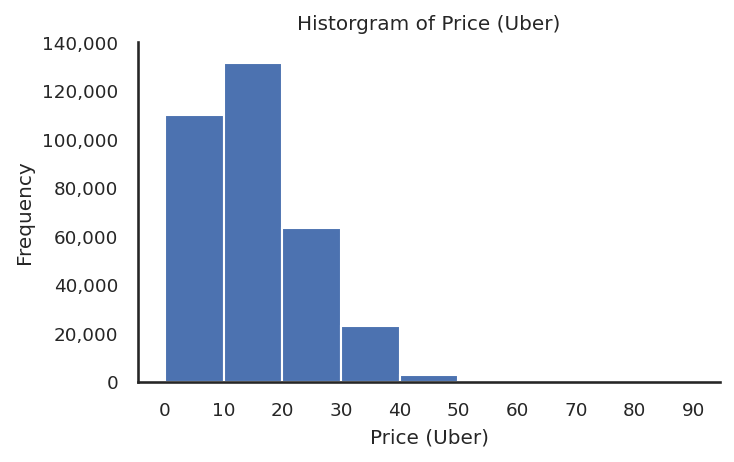

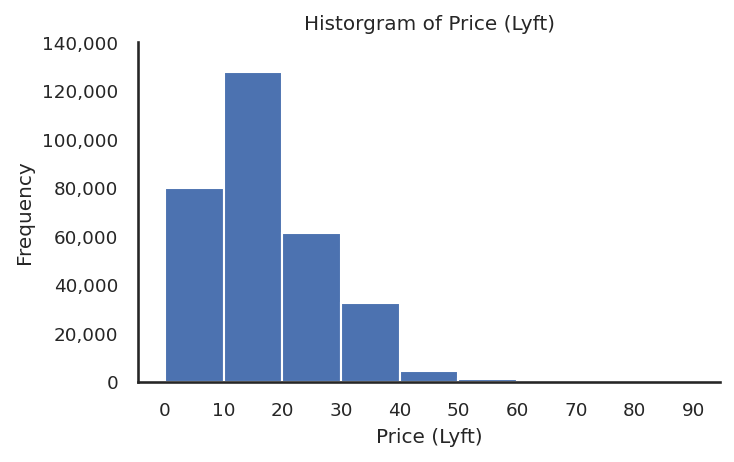

Mean for Uber: 15.795343166912708
Mean for Lyft: 17.351396125019512


In [ ]:
create_histogram(cab_data.loc[cab_data['cab_type'] == 'Uber'], 'price', 'Price (Uber)', np.arange(0,100,10), ylim=(0, 140000))
create_histogram(cab_data.loc[cab_data['cab_type'] == 'Lyft'], 'price', 'Price (Lyft)', np.arange(0,100,10), ylim=(0, 140000))
print('Mean for Uber:', cab_data.loc[cab_data['cab_type'] == 'Uber', 'price'].mean())
print('Mean for Lyft:', cab_data.loc[cab_data['cab_type'] == 'Lyft', 'price'].mean())

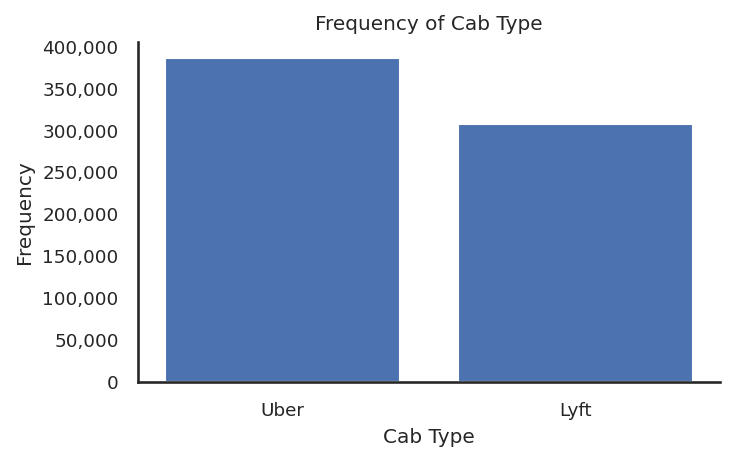

In [ ]:
create_frequency_bar(cab_data, 'cab_type', 'Cab Type')

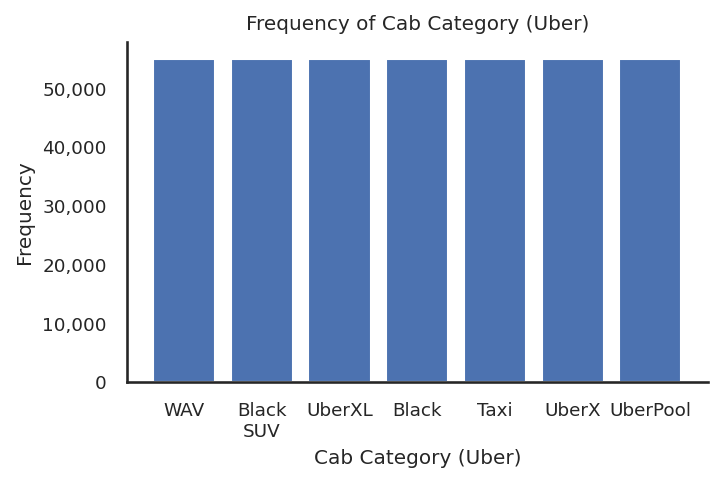

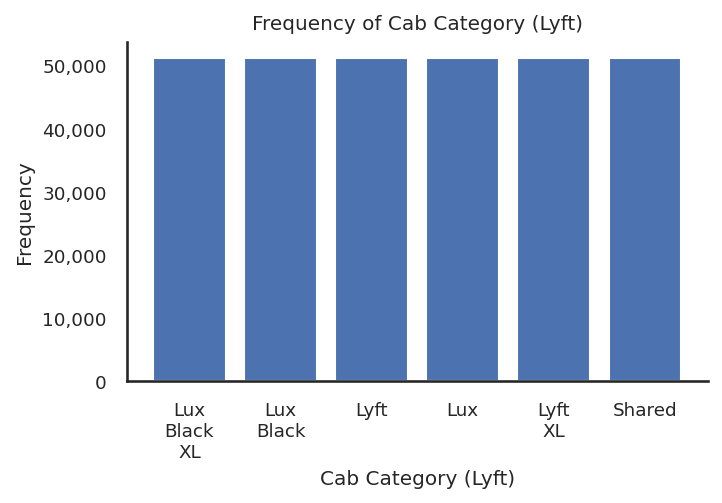

In [ ]:
uber_cabs = cab_data.loc[cab_data['cab_type'] == 'Uber', :]
lyft_cabs = cab_data.loc[cab_data['cab_type'] == 'Lyft', :]

create_frequency_bar(uber_cabs, 'name', 'Cab Category (Uber)', wrap=True)
create_frequency_bar(lyft_cabs, 'name', 'Cab Category (Lyft)', wrap=True)

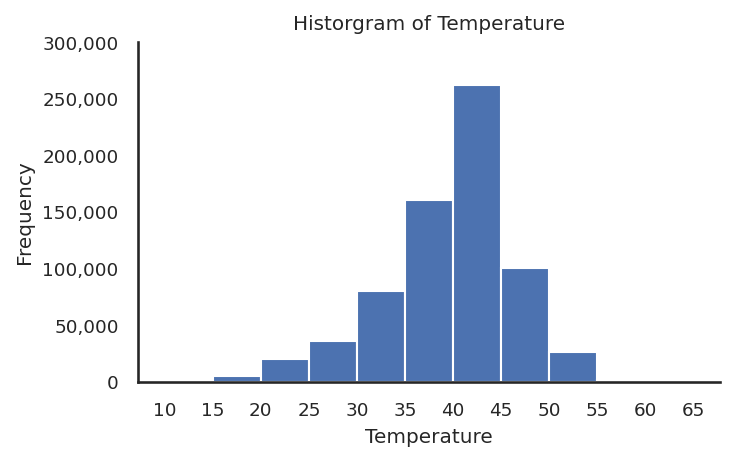

In [ ]:
create_histogram(cab_data, 'temperature', 'Temperature', np.arange(10,70,5), ylim=(0, 300000))

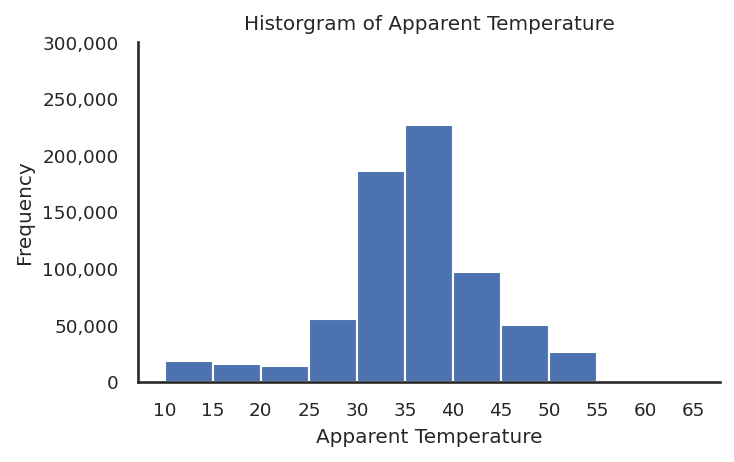

In [ ]:
create_histogram(cab_data, 'apparentTemperature', 'Apparent Temperature', np.arange(10,70,5), ylim=(0, 300000))

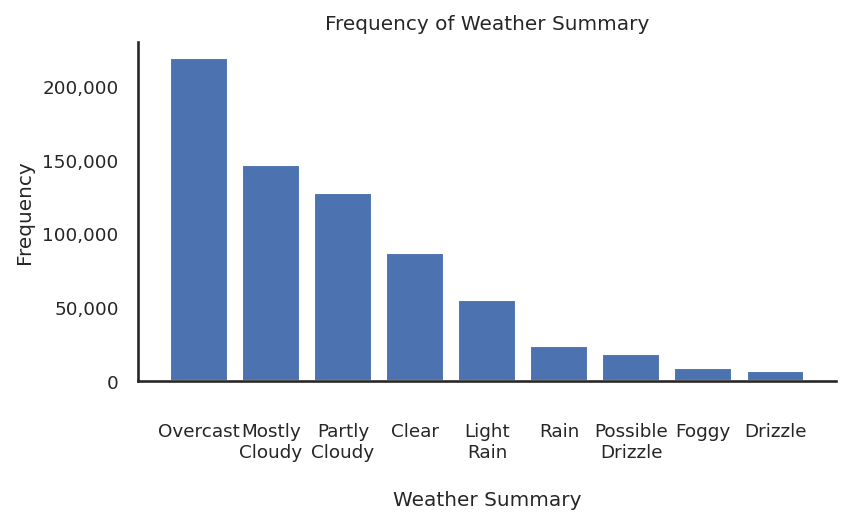

In [ ]:
create_frequency_bar(cab_data, 'short_summary', 'Weather Summary', size=(6, 3), wrap=True)

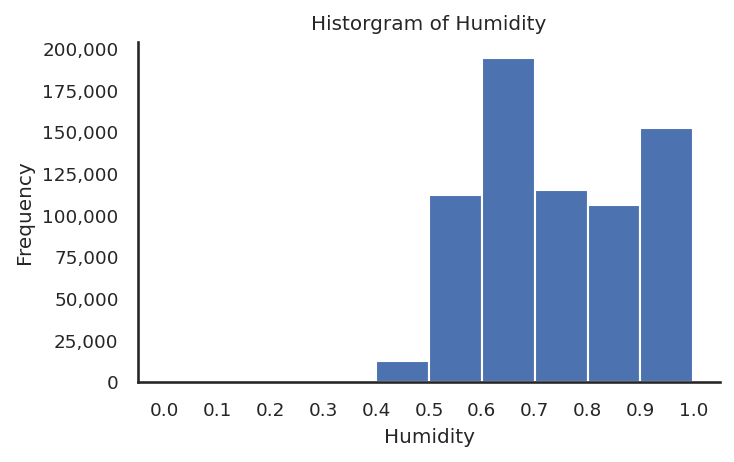

In [ ]:
create_histogram(cab_data, 'humidity', 'Humidity', np.arange(0,1.1,0.1))

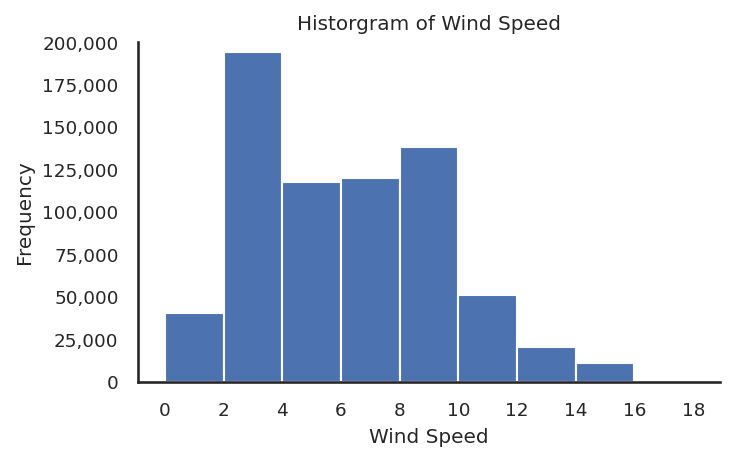

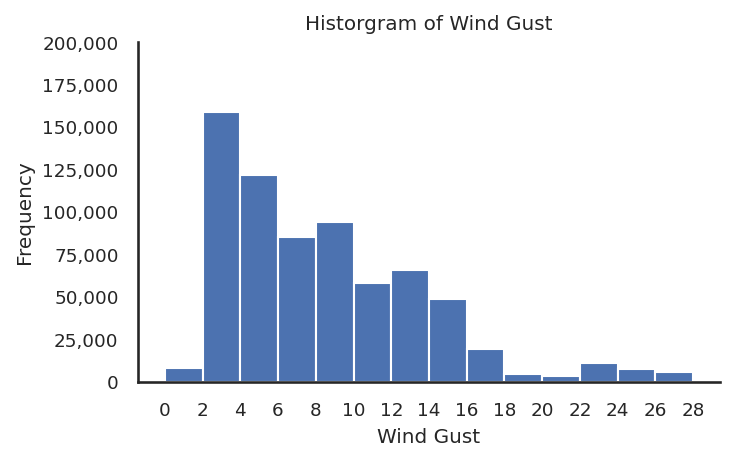

In [ ]:
create_histogram(cab_data, 'windSpeed', 'Wind Speed', np.arange(0,20,2), ylim=(0, 200000))
create_histogram(cab_data, 'windGust', 'Wind Gust', np.arange(0,30,2), ylim=(0, 200000))

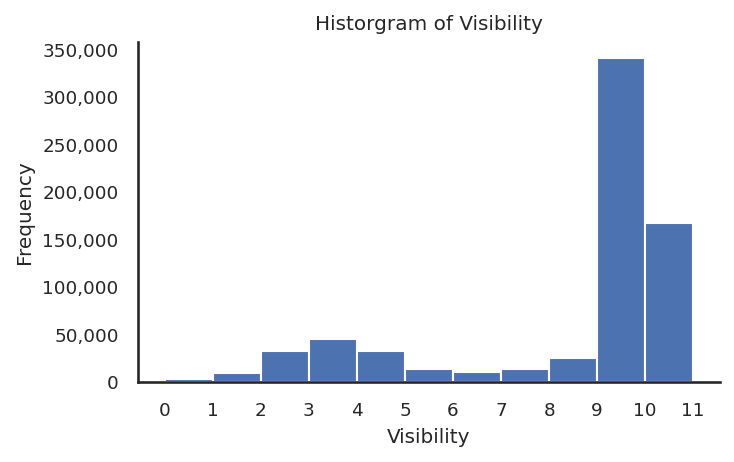

In [ ]:
create_histogram(cab_data, 'visibility', 'Visibility', np.arange(0,12,1))

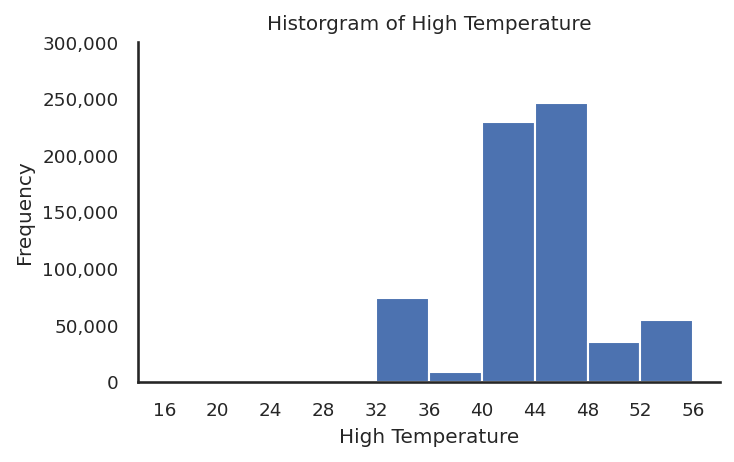

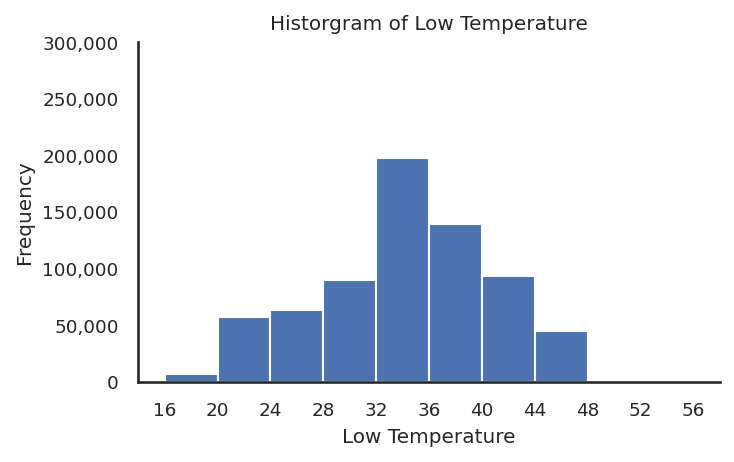

In [ ]:
create_histogram(cab_data, 'temperatureHigh', 'High Temperature', np.arange(16,58,4), ylim=(0, 300000))
create_histogram(cab_data, 'temperatureLow', 'Low Temperature', np.arange(16,58,4), ylim=(0, 300000))

### Bivariates

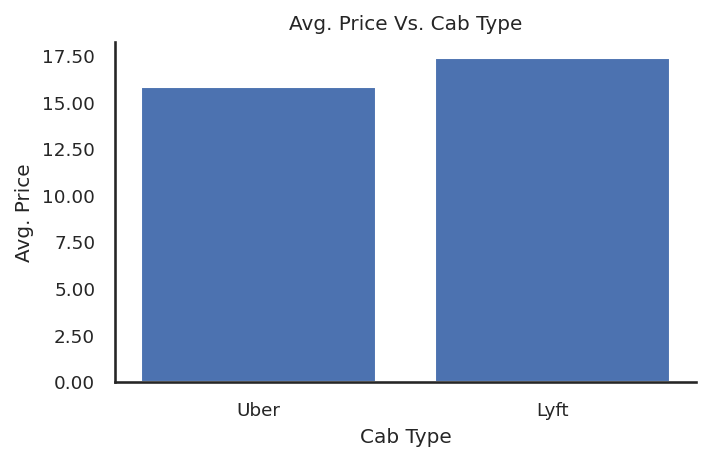

In [ ]:
data = cab_data.groupby('cab_type').agg({'price': 'mean'})
data = data.sort_values(by='price')
x = data.index
y = data['price']
create_bar(data, x, y, 'Cab Type', 'Avg. Price', 'Avg. Price Vs. Cab Type', formatter='{x:,.2f}')

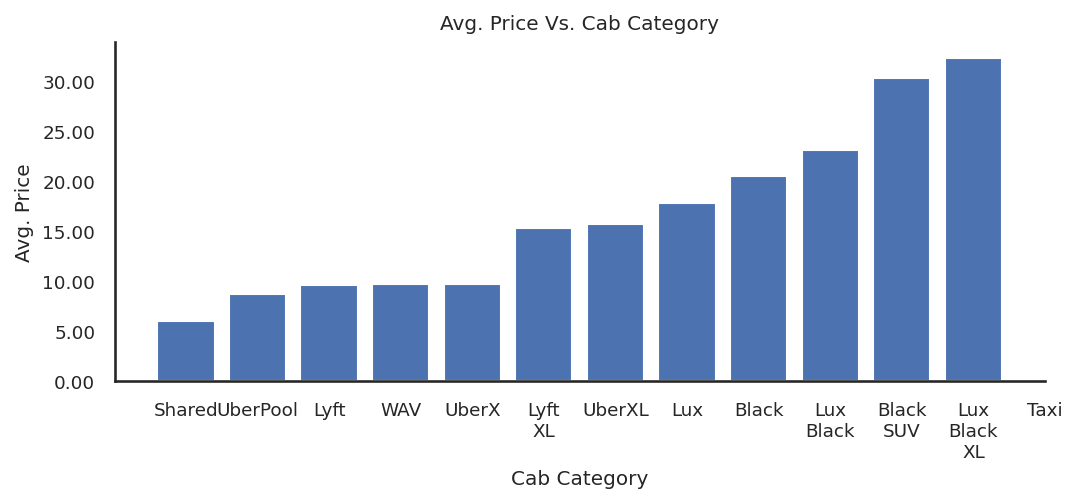

In [ ]:
data = cab_data.groupby('name').agg({'price': 'mean'})
data.index = [x.replace(' ', '\n') for x in data.index]
data = data.sort_values(by='price')
x = data.index
y = data['price']
create_bar(data, x, y, 'Cab Category', 'Avg. Price', 'Avg. Price Vs. Cab Category', size=(8,3), formatter='{x:,.2f}')

In [ ]:
cab_data.head()

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,dayOfWeek
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000105,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,2018-12-17 03:00:00,10.000,43.68,-5.0,34.19,-27.0,37.95,-5.0,27.39,-26.0,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,-3.0,-12.0,0.30,0.1276,2018-12-16 17:00:00,39.89,-17.0,43.68,-5.0,33.73,-17.0,38.07,-2.0,Sunday
4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.677000046,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,2018-11-27 04:00:00,4.786,47.30,9.0,42.10,-4.0,43.92,9.0,36.20,-2.0,rain,41.83,1003.97,90,1.00,0,4.786,291.1,14.0,4.0,0.64,0.1300,2018-11-26 17:00:00,40.49,14.0,47.30,9.0,36.20,-2.0,43.92,9.0,Tuesday
981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999954,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,2018-11-27 16:00:00,10.000,47.55,13.0,33.10,-10.0,44.12,13.0,29.11,-7.0,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,13.0,3.0,0.68,0.1064,2018-11-27 17:00:00,35.36,-3.0,47.55,13.0,31.04,-3.0,44.12,13.0,Wednesday
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.748999834,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,2018-11-29 18:00:00,10.000,45.03,11.0,28.90,-8.0,38.53,11.0,26.20,-7.0,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,17.0,7.0,0.75,0.0000,2018-11-29 16:00:00,34.67,0.0,45.03,11.0,30.30,0.0,38.53,11.0,Friday
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20.222999811,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,2018-11-28 23:00:00,10.000,42.18,11.0,36.71,-5.0,35.75,11.0,30.29,0.0,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,15.0,6.0,0.72,0.0001,2018-11-28 16:00:00,33.10,16.0,42.18,11.0,29.11,19.0,35.75,11.0,Thursday


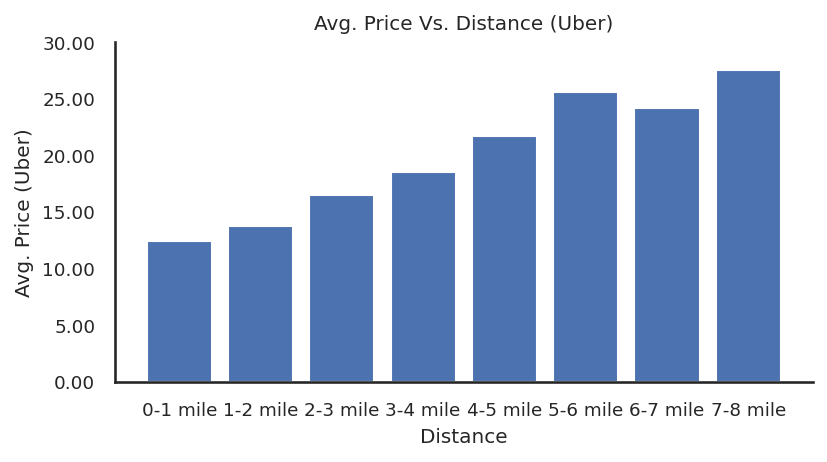

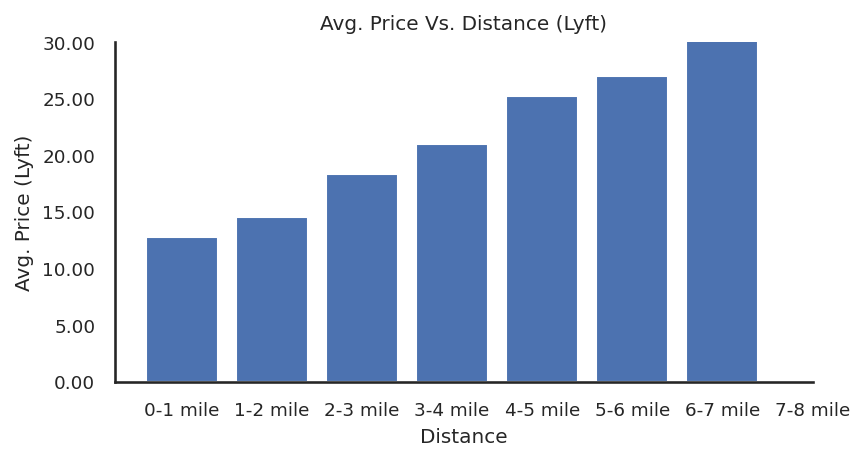

In [ ]:
data = cab_data[['price', 'distance', 'cab_type']].copy()
data['distance_bin'] = bin_var(data['distance'], 0, 9, 1, ' mile')
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('distance_bin').agg({'price': 'mean'}).reset_index()
x = data['distance_bin']
y = data['price']
create_bar(data, x, y, 'Distance', 'Avg. Price (Uber)', 'Avg. Price Vs. Distance (Uber)', size=(6,3), formatter='{x:,.2f}', ylim=(0,30))

data = cab_data[['price', 'distance', 'cab_type']].copy()
data['distance_bin'] = bin_var(data['distance'], 0, 9, 1, ' mile')
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('distance_bin').agg({'price': 'mean'}).reset_index()
x = data['distance_bin']
y = data['price']
create_bar(data, x, y, 'Distance', 'Avg. Price (Lyft)', 'Avg. Price Vs. Distance (Lyft)', size=(6,3), formatter='{x:,.2f}', ylim=(0,30))

In [ ]:
data = cab_data[['price', 'distance', 'cab_type']].copy()
data['distance_bin'] = bin_var(data['distance'], 0, 9, 1, ' mile')
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('distance_bin').agg({'price': 'mean'}).reset_index()
x = data['distance_bin']
y = data['price']
y

0    12.472670
1    13.787157
2    16.516664
3    18.566509
4    21.750604
5    25.575933
6    24.159025
7    27.578658
Name: price, dtype: float64

In [ ]:
data = cab_data[['price', 'distance', 'cab_type']].copy()
data['distance_bin'] = bin_var(data['distance'], 0, 9, 1, ' mile')
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('distance_bin').agg({'price': 'mean'}).reset_index()
x = data['distance_bin']
y = data['price']
y

0    12.796494
1    14.587456
2    18.356212
3    20.971349
4    25.244670
5    27.043881
6    30.326389
7          NaN
Name: price, dtype: float64

In [ ]:
30.326389 - 24.159025

6.167363999999999

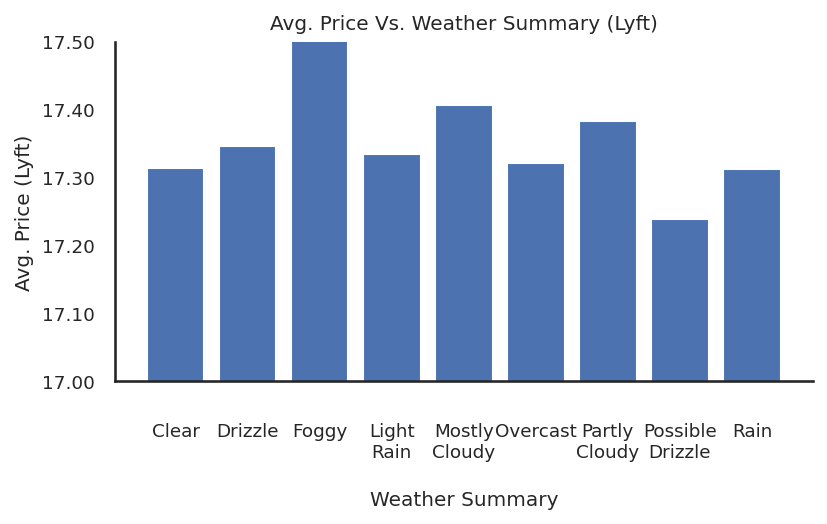

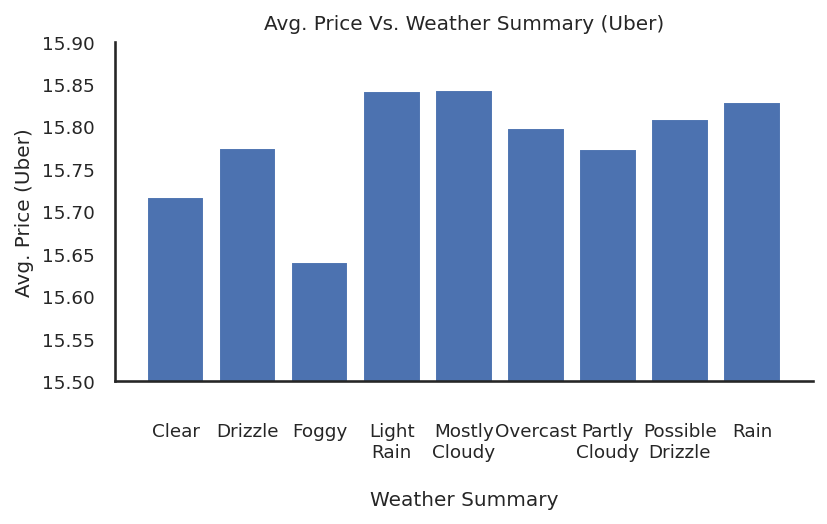

In [ ]:
data = cab_data.loc[cab_data['cab_type'] == 'Lyft', :].groupby('short_summary').agg({'price': 'mean'}).sort_index()
data.index = [x.replace(' ', '\n') for x in data.index]
# data = data.sort_values(by='price')
x = data.index
y = data['price']
create_bar(data, x, y, 'Weather Summary', 'Avg. Price (Lyft)', 'Avg. Price Vs. Weather Summary (Lyft)', size=(6,3), formatter='{x:,.2f}', ylim=(17,17.5))

data = cab_data.loc[cab_data['cab_type'] == 'Uber', :].groupby('short_summary').agg({'price': 'mean'}).sort_index()
data.index = [x.replace(' ', '\n') for x in data.index]
# data = data.sort_values(by='price')
x = data.index
y = data['price']
create_bar(data, x, y, 'Weather Summary', 'Avg. Price (Uber)', 'Avg. Price Vs. Weather Summary (Uber)', size=(6,3), formatter='{x:,.2f}', ylim=(15.5,15.9))

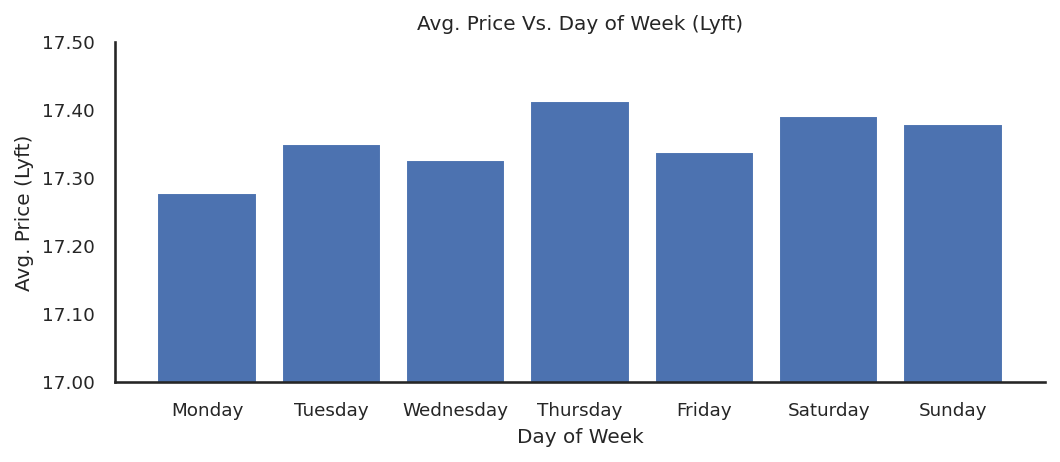

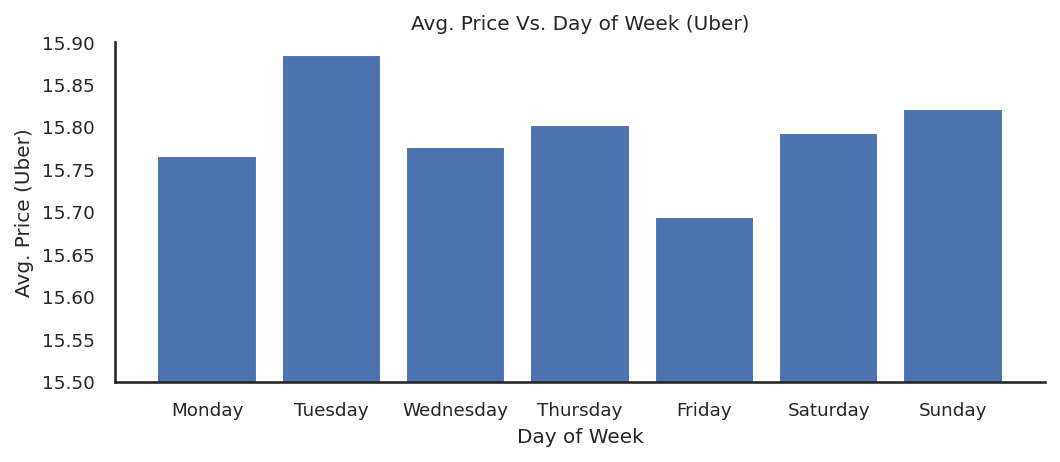

In [ ]:
data = cab_data.loc[cab_data['cab_type'] == 'Lyft', :].groupby('dayOfWeek').agg({'price': 'mean'}).sort_index()
data.index = [x.replace(' ', '\n') for x in data.index]
data = data.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], :]
x = data.index
y = data['price']
create_bar(data, x, y, 'Day of Week', 'Avg. Price (Lyft)', 'Avg. Price Vs. Day of Week (Lyft)', size=(8,3), formatter='{x:,.2f}', ylim=(17,17.5))

data = cab_data.loc[cab_data['cab_type'] == 'Uber', :].groupby('dayOfWeek').agg({'price': 'mean'}).sort_index()
data.index = [x.replace(' ', '\n') for x in data.index]
data = data.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], :]
x = data.index
y = data['price']
create_bar(data, x, y, 'Day of Week', 'Avg. Price (Uber)', 'Avg. Price Vs. Day of Week (Uber)', size=(8,3), formatter='{x:,.2f}', ylim=(15.5,15.9))

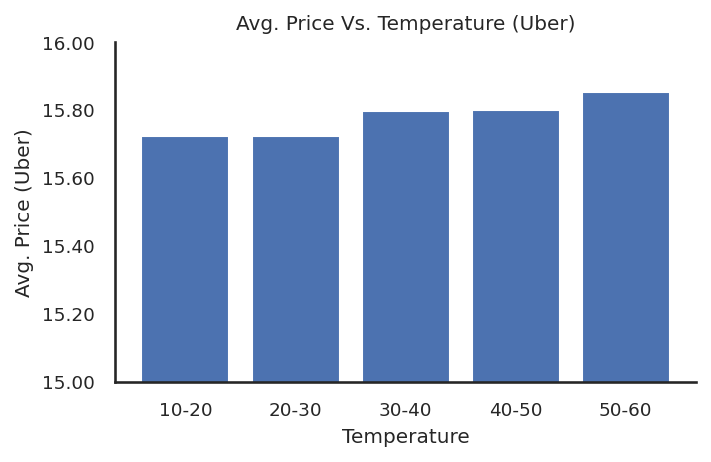

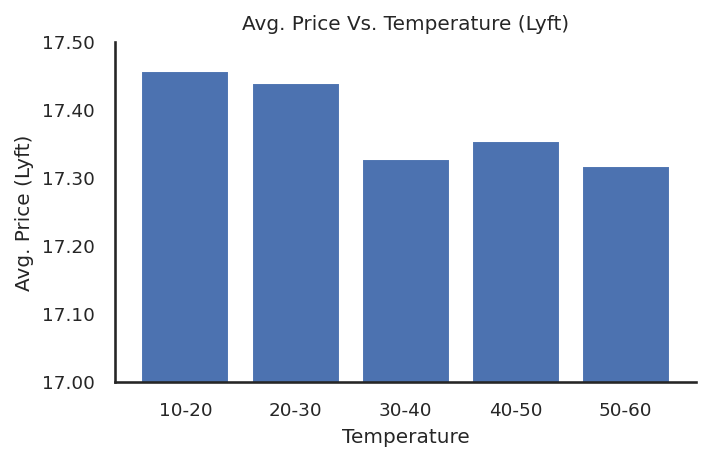

In [ ]:
data = cab_data[['price', 'temperature', 'cab_type']].copy()
data['temperature_bin'] = bin_var(cab_data['temperature'], 10, 70, 10)
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('temperature_bin').agg({'price': 'mean'}).reset_index()
x = data['temperature_bin']
y = data['price']
create_bar(data, x, y, 'Temperature', 'Avg. Price (Uber)', 'Avg. Price Vs. Temperature (Uber)', formatter='{x:,.2f}', ylim=(15,16))

data = cab_data[['price', 'temperature', 'cab_type']].copy()
data['temperature_bin'] = bin_var(cab_data['temperature'], 10, 70, 10)
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('temperature_bin').agg({'price': 'mean'}).reset_index()
x = data['temperature_bin']
y = data['price']
create_bar(data, x, y, 'Temperature', 'Avg. Price (Lyft)', 'Avg. Price Vs. Temperature (Lyft)', formatter='{x:,.2f}', ylim=(17,17.5))

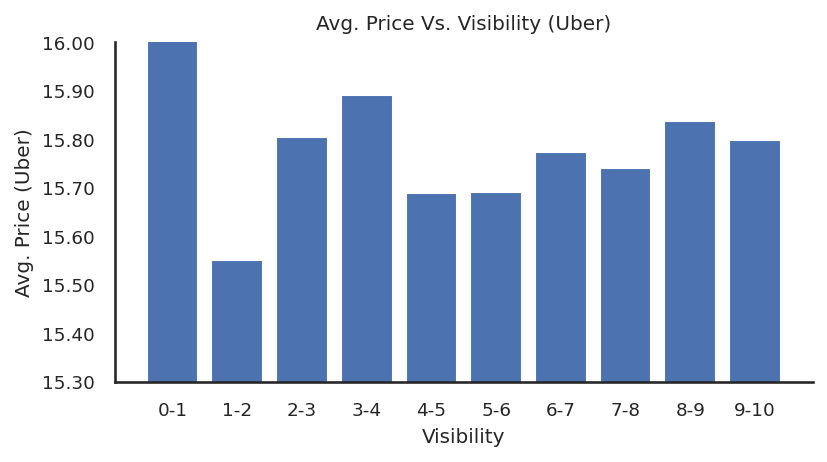

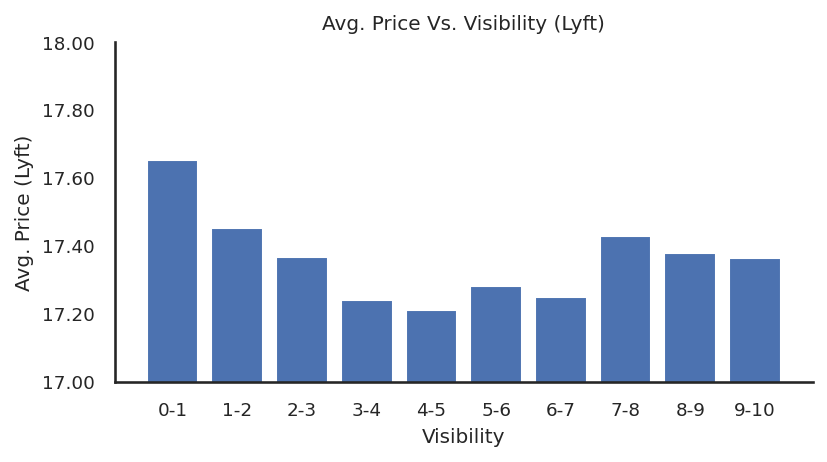

In [ ]:
data = cab_data[['price', 'visibility', 'cab_type']].copy()
data['visibility_bin'] = bin_var(cab_data['visibility'], 0, 11, 1)
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('visibility_bin').agg({'price': 'mean'}).reset_index()
x = data['visibility_bin']
y = data['price']
create_bar(data, x, y, 'Visibility', 'Avg. Price (Uber)', 'Avg. Price Vs. Visibility (Uber)', size=(6,3), formatter='{x:,.2f}', ylim=(15.3,16))

data = cab_data[['price', 'visibility', 'cab_type']].copy()
data['visibility_bin'] = bin_var(cab_data['visibility'], 0, 11, 1)
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('visibility_bin').agg({'price': 'mean'}).reset_index()
x = data['visibility_bin']
y = data['price']
create_bar(data, x, y, 'Visibility', 'Avg. Price (Lyft)', 'Avg. Price Vs. Visibility (Lyft)', size=(6,3), formatter='{x:,.2f}', ylim=(17,18))

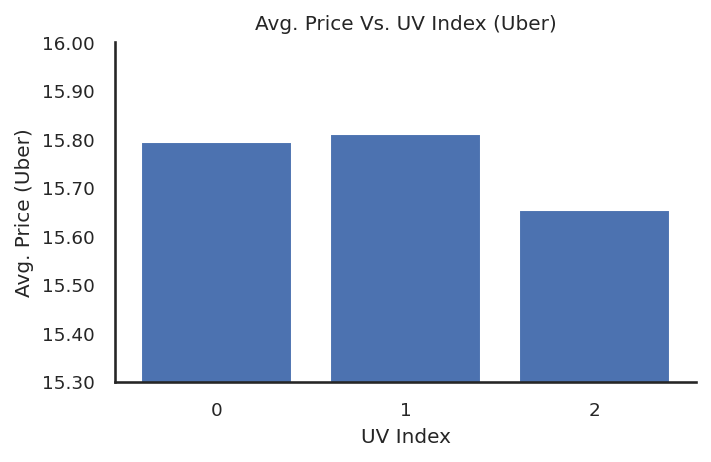

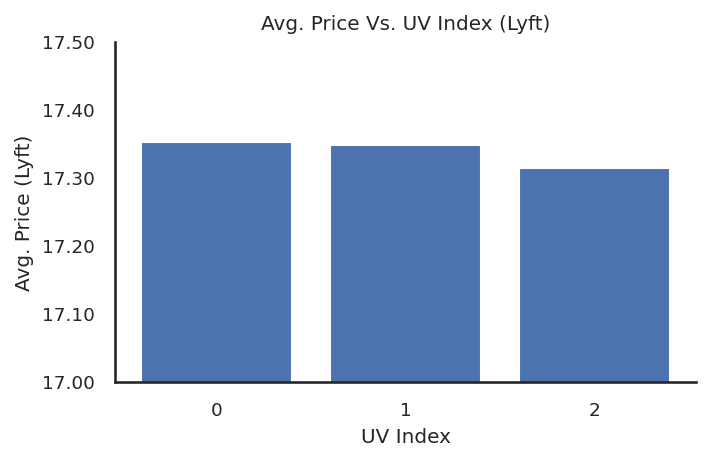

In [ ]:
data = cab_data[['price', 'uvIndex', 'cab_type']].copy()
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('uvIndex').agg({'price': 'mean'}).reset_index()
x = data['uvIndex']
y = data['price']
create_bar(data, x, y, 'UV Index', 'Avg. Price (Uber)', 'Avg. Price Vs. UV Index (Uber)', formatter='{x:,.2f}', ylim=(15.3,16))

data = cab_data[['price', 'uvIndex', 'cab_type']].copy()
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('uvIndex').agg({'price': 'mean'}).reset_index()
x = data['uvIndex']
y = data['price']
create_bar(data, x, y, 'UV Index', 'Avg. Price (Lyft)', 'Avg. Price Vs. UV Index (Lyft)', formatter='{x:,.2f}', ylim=(17,17.5))

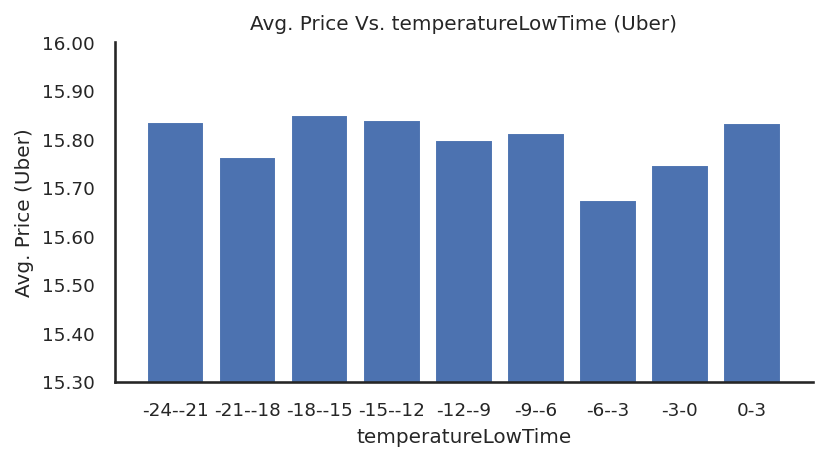

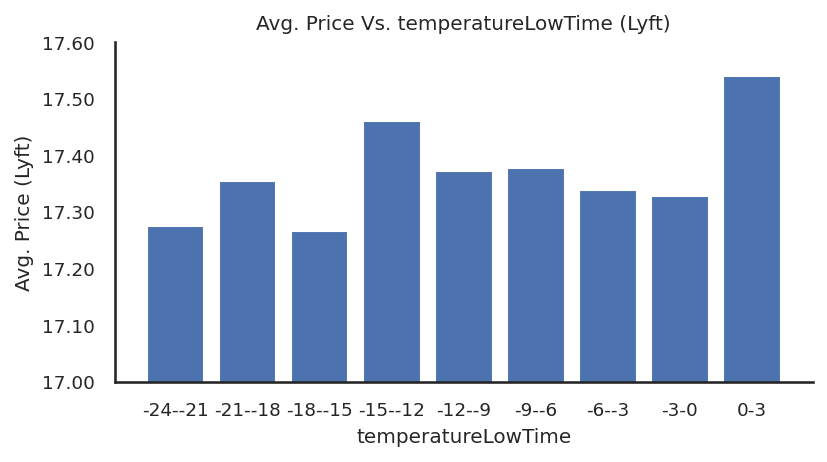

In [ ]:
data = cab_data[['price', 'temperatureLowTime', 'cab_type']].copy()
data['temperatureLowTime_bin'] = bin_var(cab_data['temperatureLowTime'], -24, 6, 3)
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('temperatureLowTime_bin').agg({'price': 'mean'}).reset_index()
x = data['temperatureLowTime_bin']
y = data['price']
create_bar(data, x, y, 'temperatureLowTime', 'Avg. Price (Uber)', 'Avg. Price Vs. temperatureLowTime (Uber)', size=(6,3), formatter='{x:,.2f}', ylim=(15.3,16))

data = cab_data[['price', 'temperatureLowTime', 'cab_type']].copy()
data['temperatureLowTime_bin'] = bin_var(cab_data['temperatureLowTime'], -24, 6, 3)
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('temperatureLowTime_bin').agg({'price': 'mean'}).reset_index()
x = data['temperatureLowTime_bin']
y = data['price']
create_bar(data, x, y, 'temperatureLowTime', 'Avg. Price (Lyft)', 'Avg. Price Vs. temperatureLowTime (Lyft)', size=(6,3), formatter='{x:,.2f}', ylim=(17,17.6))

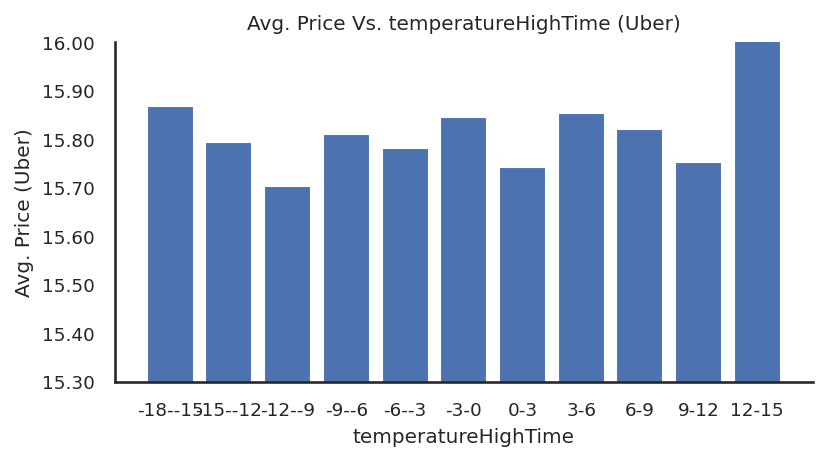

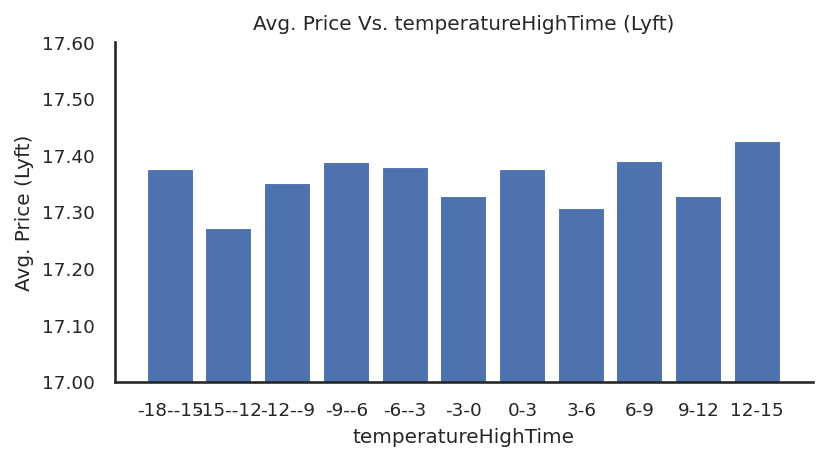

In [ ]:
data = cab_data[['price', 'temperatureHighTime', 'cab_type']].copy()
data['temperatureHighTime_bin'] = bin_var(cab_data['temperatureHighTime'], -18, 18, 3)
data = data.loc[data['cab_type'] == 'Uber', :]
data = data.groupby('temperatureHighTime_bin').agg({'price': 'mean'}).reset_index()
x = data['temperatureHighTime_bin']
y = data['price']
create_bar(data, x, y, 'temperatureHighTime', 'Avg. Price (Uber)', 'Avg. Price Vs. temperatureHighTime (Uber)', size=(6,3), formatter='{x:,.2f}', ylim=(15.3,16))

data = cab_data[['price', 'temperatureHighTime', 'cab_type']].copy()
data['temperatureHighTime_bin'] = bin_var(cab_data['temperatureHighTime'], -18, 18, 3)
data = data.loc[data['cab_type'] == 'Lyft', :]
data = data.groupby('temperatureHighTime_bin').agg({'price': 'mean'}).reset_index()
x = data['temperatureHighTime_bin']
y = data['price']
create_bar(data, x, y, 'temperatureHighTime', 'Avg. Price (Lyft)', 'Avg. Price Vs. temperatureHighTime (Lyft)', size=(6,3), formatter='{x:,.2f}', ylim=(17,17.6))

# F Tests (ANOVA)

In [ ]:
cab_data[['price', 'cab_type', 'dayOfWeek', 'hour', 'name', 'short_summary']].dropna().to_csv('cab_data.csv')

In [ ]:
# Cab type - Significant
var = 'cab_type'
model = ols('price ~ C(' + var + ')', data=cab_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
summary = cab_data.groupby(var).agg({'price' : ['count', 'sum', 'mean', 'var']})
display(summary.round(2))
display(aov_table.round(2))
print('SS Sum', aov_table['sum_sq'].sum())
print('DF Sum', aov_table['df'].sum())

price                           
           count         sum   mean     var
cab_type                                   
Lyft      307408  5333957.98  17.35  100.38
Uber      330568  5221435.00  15.80   73.28

,sum_sq,df,F,PR(>F)
C(cab_type),385674.02,1.0,4466.96,0.0
Residual,55082209.36,637974.0,NaN,NaN


SS Sum 55467883.37354966
DF Sum 637975.0


In [ ]:
# Day of Week - Almost Significant
var = 'dayOfWeek'
model = ols('price ~ C(' + var + ')', data=cab_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
summary = cab_data.groupby(var).agg({'price' : ['count', 'sum', 'mean', 'var']})
display(summary.round(2))
display(aov_table.round(2))
print('SS Sum', aov_table['sum_sq'].sum())
print('DF Sum', aov_table['df'].sum())

price                          
            count         sum   mean    var
dayOfWeek                                  
Friday      82888  1366738.20  16.49  86.56
Monday     114239  1884137.85  16.49  86.20
Saturday    83012  1375224.00  16.57  87.07
Sunday      84186  1395118.50  16.57  87.20
Thursday    90718  1503593.93  16.57  86.38
Tuesday    115091  1909410.80  16.59  88.06
Wednesday   67842  1121169.70  16.53  87.03

,sum_sq,df,F,PR(>F)
C(dayOfWeek),1008.98,6.0,1.93,0.07
Residual,55466874.39,637969.0,NaN,NaN


SS Sum 55467883.3735524
DF Sum 637975.0


In [ ]:
# Hour - Insignificant
var = 'hour'
model = ols('price ~ C(' + var + ')', data=cab_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
summary = cab_data.groupby(var).agg({'price' : ['count', 'sum', 'mean', 'var']})
display(summary.round(2))
display(aov_table.round(2))
print('SS Sum', aov_table['sum_sq'].sum())
print('DF Sum', aov_table['df'].sum())

price                         
      count        sum   mean    var
hour                                
0     29872  495121.50  16.57  87.69
1     26310  434477.50  16.51  87.12
2     26323  435956.35  16.56  87.38
3     25530  422259.00  16.54  85.84
4     26125  433134.50  16.58  86.80
5     22995  380273.30  16.54  86.76
6     25147  415411.50  16.52  87.24
7     22930  378153.00  16.49  86.05
8     22337  370868.50  16.60  87.61
9     26673  440440.00  16.51  85.95
10    27918  460675.50  16.50  85.01
11    27946  462744.00  16.56  89.53
12    28017  461875.00  16.49  86.53
13    27977  463012.20  16.55  87.36
14    27976  462999.50  16.55  87.00
15    27868  460513.50  16.52  85.88
16    27972  461929.35  16.51  85.84
17    28075  466269.50  16.61  89.21
18    27958  461778.00  16.52  86.46
19    25410  420597.43  16.55  86.01
20    24620  408672.50  16.60  88.48
21    25549  424223.85  16.60  87.58
22    27093  449618.00  16.60  87.29
23    29355  484389.50  16.50  86.08

,sum_sq,df,F,PR(>F)
C(hour),898.61,23.0,0.45,0.99
Residual,55466984.76,637952.0,NaN,NaN


SS Sum 55467883.37355293
DF Sum 637975.0


In [ ]:
# Cab Category - Significant
var = 'name'
model = ols('price ~ C(' + var + ')', data=cab_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
summary = cab_data.groupby(var).agg({'price' : ['count', 'sum', 'mean', 'var']})
display(summary.round(2))
display(aov_table.round(2))
print('SS Sum', aov_table['sum_sq'].sum())
print('DF Sum', aov_table['df'].sum())

price                          
              count         sum   mean    var
name                                         
Black         55095  1130758.00  20.52  24.52
Black SUV     55096  1668679.50  30.29  23.39
Lux           51235   910509.50  17.77  28.01
Lux Black     51235  1181605.55  23.06  41.90
Lux Black XL  51235  1656124.55  32.32  51.57
Lyft          51235   492413.68   9.61   6.40
Lyft XL       51235   784375.20  15.31  20.75
Shared        51233   308929.50   6.03   4.44
Taxi              0        0.00    NaN    NaN
UberPool      55091   482184.00   8.75   4.44
UberX         55094   537997.00   9.77   6.08
UberXL        55096   863803.00  15.68  20.47
WAV           55096   538013.50   9.77   6.08

,sum_sq,df,F,PR(>F)
C(name),46848473.37,12.0,198877.84,0.0
Residual,12523449.45,637964.0,NaN,NaN


SS Sum 59371922.82072053
DF Sum 637976.0


In [ ]:
# Weather Summary - Insignificant
var = 'short_summary'
model = ols('price ~ C(' + var + ')', data=cab_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
summary = cab_data.groupby(var).agg({'price' : ['count', 'sum', 'mean', 'var']})
display(summary.round(2))
display(aov_table.round(2))
print('SS Sum', aov_table['sum_sq'].sum())
print('DF Sum', aov_table['df'].sum())

price                          
                     count         sum   mean    var
short_summary                                       
 Clear               80256  1323137.35  16.49  86.46
 Drizzle              6725   110974.50  16.50  85.80
 Foggy                8292   137157.00  16.54  85.18
 Light Rain          50488   836146.00  16.56  87.19
 Mostly Cloudy      134603  2233658.63  16.59  87.89
 Overcast           201429  3330651.85  16.54  86.81
 Partly Cloudy      117226  1940325.85  16.55  86.75
 Possible Drizzle    17176   283084.35  16.48  85.81
 Rain                21781   360257.45  16.54  86.51

,sum_sq,df,F,PR(>F)
C(short_summary),725.33,8.0,1.04,0.4
Residual,55467158.05,637967.0,NaN,NaN


SS Sum 55467883.373553835
DF Sum 637975.0


# Feature Engineering

In [8]:
cab_data = cab_data.join(pd.get_dummies(cab_data['hour'], prefix='hour', drop_first=True)).drop(columns='hour')
cab_data = cab_data.join(pd.get_dummies(cab_data['cab_type'], prefix='cab_type', drop_first=True)).drop(columns='cab_type')
cab_data = cab_data.join(pd.get_dummies(cab_data['name'], prefix='name', drop_first=True)).drop(columns='name')
cab_data = cab_data.join(pd.get_dummies(cab_data['short_summary'], prefix='short_summary', drop_first=True)).drop(columns='short_summary')
cab_data = cab_data.join(pd.get_dummies(cab_data['dayOfWeek'], prefix='dayOfWeek', drop_first=True)).drop(columns='dayOfWeek')

In [9]:
cab_data = cab_data.drop(columns=['day',
                                  'month',
                                  'timestamp', 
                                  'timezone', 
                                  'source', 
                                  'destination', 
                                  'product_id', 
                                  'surge_multiplier', 
                                  'latitude',	
                                  'longitude', 
                                  'long_summary', 
                                  'icon', 
                                  'uvIndexTime', 
                                  'windGustTime', 
                                  'datetime',
                                  'visibility.1'])

In [10]:
cab_data = cab_data.dropna()

In [11]:
zero_std_cols = cab_data.std().loc[cab_data.std() == 0].index
cab_data = cab_data.drop(columns=zero_std_cols)

In [12]:
cab_data.shape

(637976, 85)

In [13]:
cab_data.columns = [colname.replace(' ','') for colname in cab_data.columns]
cab_data.columns = [colname.replace('.','') for colname in cab_data.columns]

In [14]:
cab_data.head()

,price,distance,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,cab_type_Uber,name_BlackSUV,name_Lux,name_LuxBlack,name_LuxBlackXL,name_Lyft,name_LyftXL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_Drizzle,short_summary_Foggy,short_summary_LightRain,short_summary_MostlyCloudy,short_summary_Overcast,short_summary_PartlyCloudy,short_summary_PossibleDrizzle,short_summary_Rain,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,5.0,0.44,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,5.0,34.19,27.0,37.95,5.0,27.39,26.0,32.70,1021.98,57,0.72,0,303.8,3.0,12.0,0.30,0.1276,39.89,17.0,43.68,5.0,33.73,17.0,38.07,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4bd23055-6827-41c6-b23b-3c491f24e74d,11.0,0.44,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,9.0,42.10,4.0,43.92,9.0,36.20,2.0,41.83,1003.97,90,1.00,0,291.1,14.0,4.0,0.64,0.1300,40.49,14.0,47.30,9.0,36.20,2.0,43.92,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
981a3613-77af-4620-a42a-0c0866077d1e,7.0,0.44,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,13.0,33.10,10.0,44.12,13.0,29.11,7.0,31.10,992.28,240,0.03,0,315.7,13.0,3.0,0.68,0.1064,35.36,3.0,47.55,13.0,31.04,3.0,44.12,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,26.0,0.44,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,11.0,28.90,8.0,38.53,11.0,26.20,7.0,26.64,1013.73,310,0.00,0,291.1,17.0,7.0,0.75,0.0000,34.67,0.0,45.03,11.0,30.30,0.0,38.53,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,9.0,0.44,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,11.0,36.71,5.0,35.75,11.0,30.29,0.0,28.61,998.36,303,0.44,0,347.7,15.0,6.0,0.72,0.0001,33.10,16.0,42.18,11.0,29.11,19.0,35.75,11.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


# Correlation and VIF

In [ ]:
X = cab_data.drop(columns=['price'])

In [ ]:
categoricals = ['hour', 'cab_type', 'name', 'short_summary', 'dayOfWeek']
numerics = [col for col in X.columns if not any(cat in col for cat in categoricals)]

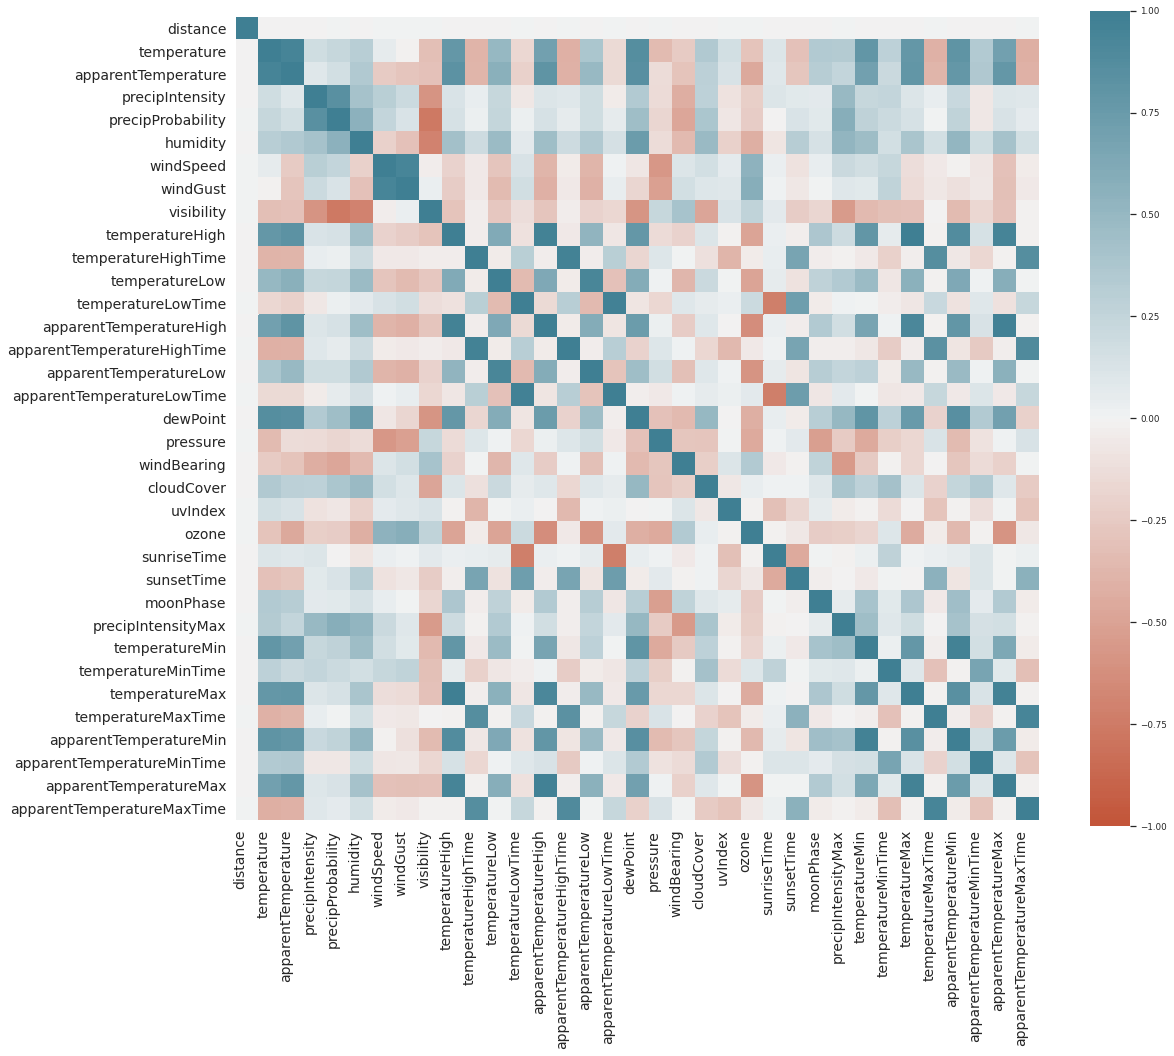

In [ ]:
# Compute the correlation matrix
corr = X[numerics].corr()

figure(figsize=(18, 15))

# Plot heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Set labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize = 14
);

# Set labels
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right',
    fontsize = 14
);

plt.show()

In [15]:
remove_cols_corr = ['sunsetTime', 
                    'sunriseTime', 
                    'apparentTemperatureHighTime', 
                    'apparentTemperatureMaxTime',
                    'apparentTemperatureLowTime',
                    'apparentTemperature',
                    'apparentTemperatureLow',
                    'apparentTemperatureMin',
                    'apparentTemperatureHigh',
                    'apparentTemperatureMax',
                    'windGust',
                    'temperatureMaxTime',
                    'temperatureMax',
                    'precipProbability',
                    'humidity',
                    'pressure',
                    'precipIntensityMax',
                    'dewPoint',
                    'temperatureHigh',
                    'temperatureMin',
                    'apparentTemperatureMinTime'
                    ]

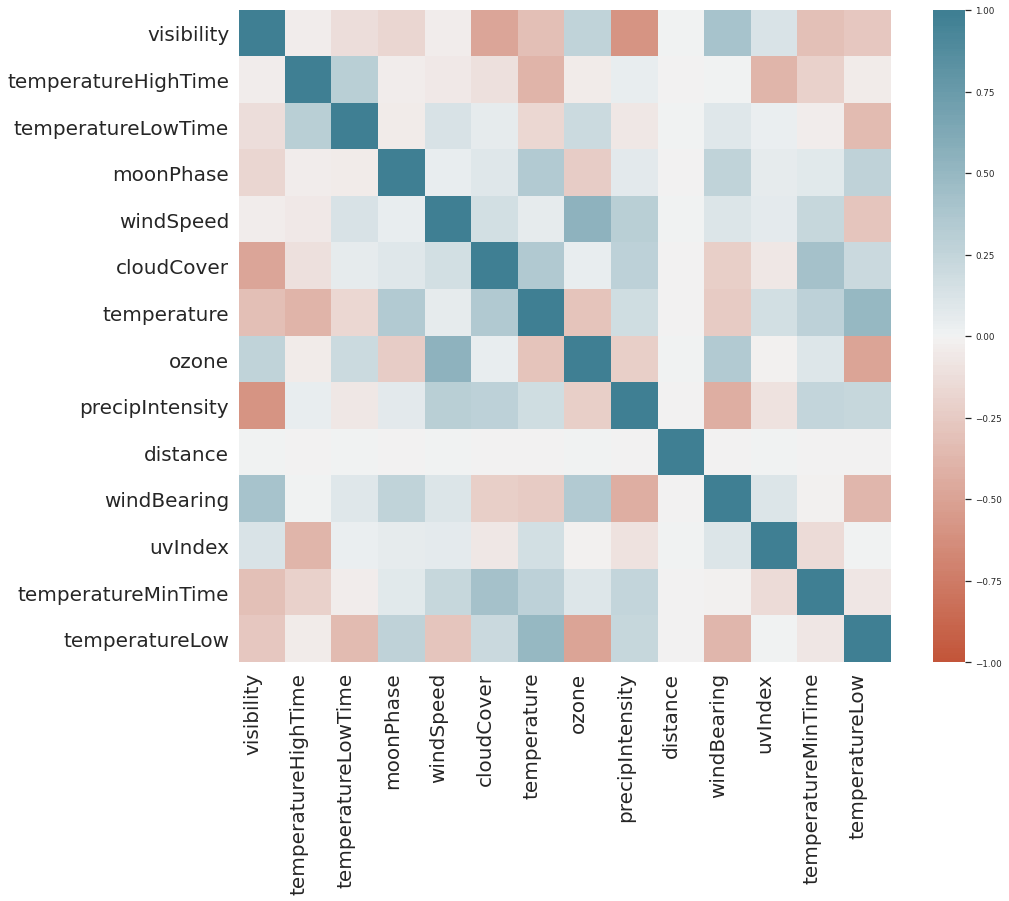

In [ ]:
numerics = list(set(numerics) - set(remove_cols_corr))

# Compute the correlation matrix
corr = X[numerics].corr()

figure(figsize=(15, 12))

# Plot heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Set labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize = 20
);

# Set labels
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right',
    fontsize = 20
);
plt.show()

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    VIFs = []
    for i in range(X.shape[1]):
      VIFs.append(variance_inflation_factor(X.values, i))
    vif["VIF"] = VIFs

    return(vif)

In [ ]:
X['constant'] = 1
VIF = calc_vif(X[list(set(X.columns) - set(remove_cols_corr))])

In [ ]:
VIF.sort_values(by='VIF', ascending=False)

,variables,VIF
38,cab_type_Uber,inf
16,name_Shared,inf
57,name_LyftXL,inf
53,name_Lyft,inf
48,name_LuxBlack,inf
45,name_Lux,inf
25,name_LuxBlackXL,inf
42,short_summary_Overcast,46.360774
7,cloudCover,28.729645
43,short_summary_LightRain,24.159704


In [16]:
remove_cols_VIF = ['cab_type_Uber', 
                   'short_summary_Overcast', 
                   'precipIntensity',
                   'temperatureLowTime',
                   'uvIndex',
                   'ozone',
                   'visibility',
                   'temperatureHighTime']

In [ ]:
VIF = calc_vif(X[list(set(X.columns) - set(remove_cols_corr) - set(remove_cols_VIF))])
VIF.sort_values(by='VIF', ascending=False)

,variables,VIF
28,constant,145.943698
0,dayOfWeek_Tuesday,3.795588
8,dayOfWeek_Monday,3.148147
3,temperature,3.136922
13,temperatureLow,2.737363
29,dayOfWeek_Thursday,2.517267
49,dayOfWeek_Sunday,2.512977
5,windBearing,2.475885
44,windSpeed,2.363755
30,cloudCover,2.337540


In [18]:
cols_to_remove = remove_cols_corr + remove_cols_VIF

# Modeling

## Bifurcate Data for Modeling

In [19]:
# Original Columns
cab_data_lyft_rides = cab_data.loc[cab_data['cab_type_Uber'] == 0, :].drop(columns = ['cab_type_Uber'])
cab_data_uber_rides = cab_data.loc[cab_data['cab_type_Uber'] == 1, :].drop(columns = ['cab_type_Uber'])
cab_data_all_rides = cab_data[list(set(cab_data.columns) - set(cols_to_remove))]
cab_data_lyft_rides = cab_data_lyft_rides[list(set(cab_data_lyft_rides.columns) - set(cols_to_remove))]
cab_data_uber_rides = cab_data_uber_rides[list(set(cab_data_uber_rides.columns) - set(cols_to_remove))]

# Log Price
cab_data_all_rides_log_price = cab_data_all_rides.copy(deep=True)
cab_data_all_rides_log_price['log_price'] = np.log(cab_data_all_rides_log_price['price'])
cab_data_all_rides_log_price = cab_data_all_rides_log_price.drop(columns = ['price'])

cab_data_lyft_rides_log_price = cab_data_lyft_rides.copy(deep=True)
cab_data_lyft_rides_log_price['log_price'] = np.log(cab_data_lyft_rides_log_price['price'])
cab_data_lyft_rides_log_price = cab_data_lyft_rides_log_price.drop(columns = ['price'])

cab_data_uber_rides_log_price = cab_data_uber_rides.copy(deep=True)
cab_data_uber_rides_log_price['log_price'] = np.log(cab_data_uber_rides_log_price['price'])
cab_data_uber_rides_log_price = cab_data_uber_rides_log_price.drop(columns = ['price'])

# Log Price and Log Distance
cab_data_all_rides_log_price_distance = cab_data_all_rides_log_price.copy(deep=True)
cab_data_all_rides_log_price_distance['log_distance'] = np.log(cab_data_all_rides_log_price_distance['distance'])
cab_data_all_rides_log_price_distance = cab_data_all_rides_log_price_distance.drop(columns = ['distance'])

cab_data_lyft_rides_log_price_distance = cab_data_lyft_rides_log_price.copy(deep=True)
cab_data_lyft_rides_log_price_distance['log_distance'] = np.log(cab_data_lyft_rides_log_price_distance['distance'])
cab_data_lyft_rides_log_price_distance = cab_data_lyft_rides_log_price_distance.drop(columns = ['distance'])

cab_data_uber_rides_log_price_distance = cab_data_uber_rides_log_price.copy(deep=True)
cab_data_uber_rides_log_price_distance['log_distance'] = np.log(cab_data_uber_rides_log_price_distance['distance'])
cab_data_uber_rides_log_price_distance = cab_data_uber_rides_log_price_distance.drop(columns = ['distance'])

In [20]:
print('All:', cab_data_all_rides.shape)
print('Lyft:', cab_data_lyft_rides.shape)
print('Uber:', cab_data_uber_rides.shape)

All: (637976, 56)
Lyft: (307408, 56)
Uber: (330568, 56)


In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = [x for x in data.columns if x != target]
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            formula_ols = target + '~' + '+'.join([x for x in best_features]) + '+' + new_column
            model = ols(formula=formula_ols, data=data).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < significance_level):
            best_features.append(new_pval.idxmin())
            print('Added:', new_pval.idxmin())
        else:
            break
    return best_features

## All Rides

### Full Model: v1.0

In [ ]:
target = 'price'
formula_ols = target + '~' + '+'.join([x for x in cab_data_all_rides.columns if x != target])

In [ ]:
model = ols(formula=formula_ols,
            data=cab_data_all_rides).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 9.723e+04
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:22:19   Log-Likelihood:            -1.6154e+06
No. Observations:              637976   AIC:                         3.231e+06
Df Residuals:                  637920   BIC:                         3.232e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Forward Selection: v1.1

In [ ]:
selected_features = forward_selection(cab_data_all_rides, 'price')
selected_features

Added: name_UberPool
Added: name_Shared
Added: name_BlackSUV
Added: name_LuxBlackXL
Added: distance
Added: name_WAV
Added: name_Lux
Added: name_UberX
Added: name_UberXL
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: short_summary_MostlyCloudy
Added: hour_11
Added: hour_13
Added: hour_17
Added: windSpeed
Added: cloudCover
Added: hour_20
Added: short_summary_Drizzle


['name_UberPool',
 'name_Shared',
 'name_BlackSUV',
 'name_LuxBlackXL',
 'distance',
 'name_WAV',
 'name_Lux',
 'name_UberX',
 'name_UberXL',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_11',
 'hour_13',
 'hour_17',
 'windSpeed',
 'cloudCover',
 'hour_20',
 'short_summary_Drizzle']

In [ ]:
target = 'price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_all_rides).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.674e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:35:28   Log-Likelihood:            -1.6155e+06
No. Observations:              637976   AIC:                         3.231e+06
Df Residuals:                  637955   BIC:                         3.231e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Forward Selection with Log Price and Log Distance v1.2

In [ ]:
selected_features = forward_selection(cab_data_all_rides_log_price_distance, 'log_price')
selected_features

Added: name_UberPool
Added: name_Shared
Added: name_BlackSUV
Added: name_LuxBlackXL
Added: name_UberXL
Added: name_WAV
Added: name_Lux
Added: name_UberX
Added: log_distance
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: short_summary_MostlyCloudy
Added: hour_13
Added: hour_17
Added: cloudCover
Added: temperatureMinTime
Added: hour_20
Added: hour_21
Added: hour_2


['name_UberPool',
 'name_Shared',
 'name_BlackSUV',
 'name_LuxBlackXL',
 'name_UberXL',
 'name_WAV',
 'name_Lux',
 'name_UberX',
 'log_distance',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_13',
 'hour_17',
 'cloudCover',
 'temperatureMinTime',
 'hour_20',
 'hour_21',
 'hour_2']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_all_rides_log_price_distance).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 3.506e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:56:23   Log-Likelihood:             2.4719e+05
No. Observations:              637976   AIC:                        -4.943e+05
Df Residuals:                  637955   BIC:                        -4.941e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Forward Selection with Log Price v1.3

In [ ]:
selected_features = forward_selection(cab_data_all_rides_log_price, 'log_price')
selected_features

Added: name_UberPool
Added: name_Shared
Added: name_BlackSUV
Added: name_LuxBlackXL
Added: distance
Added: name_UberXL
Added: name_WAV
Added: name_Lux
Added: name_UberX
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: short_summary_MostlyCloudy
Added: hour_18
Added: hour_13


['name_UberPool',
 'name_Shared',
 'name_BlackSUV',
 'name_LuxBlackXL',
 'distance',
 'name_UberXL',
 'name_WAV',
 'name_Lux',
 'name_UberX',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_18',
 'hour_13']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_all_rides_log_price).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 5.171e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:43:28   Log-Likelihood:             2.7679e+05
No. Observations:              637976   AIC:                        -5.535e+05
Df Residuals:                  637960   BIC:                        -5.534e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Lyft Rides

### Full Model: v2.0

In [ ]:
target = 'price'
formula_ols = target + '~' + '+'.join([x for x in cab_data_lyft_rides.columns if x != target])

In [ ]:
model = ols(formula=formula_ols,
            data=cab_data_lyft_rides).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 4.457e+04
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:56:26   Log-Likelihood:            -8.2298e+05
No. Observations:              307408   AIC:                         1.646e+06
Df Residuals:                  307358   BIC:                         1.647e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Forward Selection: v2.1

In [ ]:
selected_features = forward_selection(cab_data_lyft_rides, 'price')
selected_features

Added: name_Shared
Added: name_LuxBlackXL
Added: distance
Added: name_Lux
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: short_summary_MostlyCloudy
Added: hour_13
Added: hour_11
Added: hour_20
Added: hour_16


['name_Shared',
 'name_LuxBlackXL',
 'distance',
 'name_Lux',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_13',
 'hour_11',
 'hour_20',
 'hour_16']

In [ ]:
target = 'price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_lyft_rides).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.985e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:59:12   Log-Likelihood:            -8.2300e+05
No. Observations:              307408   AIC:                         1.646e+06
Df Residuals:                  307396   BIC:                         1.646e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Forward Selection with Log Price and Log Distance v2.2

In [ ]:
selected_features = forward_selection(cab_data_lyft_rides_log_price_distance, 'log_price')
selected_features

Added: name_Shared
Added: name_LuxBlackXL
Added: name_Lux
Added: log_distance
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: short_summary_MostlyCloudy
Added: hour_13
Added: hour_18
Added: hour_20


['name_Shared',
 'name_LuxBlackXL',
 'name_Lux',
 'log_distance',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_13',
 'hour_18',
 'hour_20']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_lyft_rides_log_price_distance).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.486e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:04:02   Log-Likelihood:                 94051.
No. Observations:              307408   AIC:                        -1.881e+05
Df Residuals:                  307397   BIC:                        -1.880e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Forward Selection with Log Price v2.3

In [ ]:
selected_features = forward_selection(cab_data_lyft_rides_log_price, 'log_price')
selected_features

Added: name_Shared
Added: name_LuxBlackXL
Added: distance
Added: name_Lux
Added: name_LuxBlack
Added: name_Lyft
Added: name_LyftXL
Added: hour_13
Added: short_summary_MostlyCloudy
Added: hour_20
Added: hour_16


['name_Shared',
 'name_LuxBlackXL',
 'distance',
 'name_Lux',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'hour_13',
 'short_summary_MostlyCloudy',
 'hour_20',
 'hour_16']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_lyft_rides_log_price).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 3.719e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:01:36   Log-Likelihood:             1.0320e+05
No. Observations:              307408   AIC:                        -2.064e+05
Df Residuals:                  307397   BIC:                        -2.063e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Uber Rides

### Full Model: v3.0

In [ ]:
target = 'price'
formula_ols = target + '~' + '+'.join([x for x in cab_data_uber_rides.columns if x != target])

In [ ]:
model = ols(formula=formula_ols,
            data=cab_data_uber_rides).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 7.736e+04
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:            -7.6178e+05
No. Observations:              330568   AIC:                         1.524e+06
Df Residuals:                  330518   BIC:                         1.524e+06
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Forward Selection: v3.1

In [ ]:
selected_features = forward_selection(cab_data_uber_rides, 'price')
selected_features

Added: name_UberPool
Added: name_BlackSUV
Added: distance
Added: name_UberXL
Added: name_WAV
Added: name_UberX
Added: temperatureLow
Added: hour_17
Added: dayOfWeek_Saturday
Added: windSpeed


['name_UberPool',
 'name_BlackSUV',
 'distance',
 'name_UberXL',
 'name_WAV',
 'name_UberX',
 'temperatureLow',
 'hour_17',
 'dayOfWeek_Saturday',
 'windSpeed']

In [ ]:
target = 'price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_uber_rides).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 3.791e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:06:20   Log-Likelihood:            -7.6179e+05
No. Observations:              330568   AIC:                         1.524e+06
Df Residuals:                  330557   BIC:                         1.524e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             15.2025      0

### Forward Selection with Log Price and Log Distance v3.2

In [ ]:
selected_features = forward_selection(cab_data_uber_rides_log_price_distance, 'log_price')
selected_features

Added: name_UberPool
Added: name_BlackSUV
Added: name_UberXL
Added: name_WAV
Added: name_UberX
Added: log_distance
Added: hour_17
Added: hour_2
Added: temperatureMinTime
Added: cloudCover
Added: hour_1


['name_UberPool',
 'name_BlackSUV',
 'name_UberXL',
 'name_WAV',
 'name_UberX',
 'log_distance',
 'hour_17',
 'hour_2',
 'temperatureMinTime',
 'cloudCover',
 'hour_1']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_uber_rides_log_price_distance).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.380e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:12:29   Log-Likelihood:             1.6846e+05
No. Observations:              330568   AIC:                        -3.369e+05
Df Residuals:                  330556   BIC:                        -3.368e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8228      0

### Forward Selection with Log Price v3.3

In [ ]:
selected_features = forward_selection(cab_data_uber_rides_log_price, 'log_price')
selected_features

Added: name_UberPool
Added: name_BlackSUV
Added: distance
Added: name_UberXL
Added: name_WAV
Added: name_UberX
Added: hour_17
Added: windSpeed
Added: hour_6
Added: temperatureMinTime
Added: short_summary_Drizzle
Added: cloudCover
Added: hour_12


['name_UberPool',
 'name_BlackSUV',
 'distance',
 'name_UberXL',
 'name_WAV',
 'name_UberX',
 'hour_17',
 'windSpeed',
 'hour_6',
 'temperatureMinTime',
 'short_summary_Drizzle',
 'cloudCover',
 'hour_12']

In [ ]:
target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_uber_rides_log_price).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.331e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:09:49   Log-Likelihood:             1.9173e+05
No. Observations:              330568   AIC:                        -3.834e+05
Df Residuals:                  330554   BIC:                        -3.833e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.66

# Regression Diagnostics

## Model v1.2

In [21]:
selected_features = ['name_UberPool',
'name_Shared',
'name_BlackSUV',
'name_LuxBlackXL',
'name_UberXL',
'name_WAV',
'name_Lux',
'name_UberX',
'log_distance',
'name_LuxBlack',
'name_Lyft',
'name_LyftXL',
'short_summary_MostlyCloudy',
'hour_13',
'hour_17',
'cloudCover',
'temperatureMinTime',
'hour_20',
'hour_21',
'hour_2']

target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_all_rides_log_price_distance).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 3.506e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:07:51   Log-Likelihood:             2.4719e+05
No. Observations:              637976   AIC:                        -4.943e+05
Df Residuals:                  637955   BIC:                        -4.941e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [39]:
residuals_v1_2 = cab_data_all_rides_log_price_distance[['log_price']]
residuals_v1_2['pred_price'] = model.predict(cab_data_all_rides_log_price_distance)
residuals_v1_2['residuals'] = model.resid

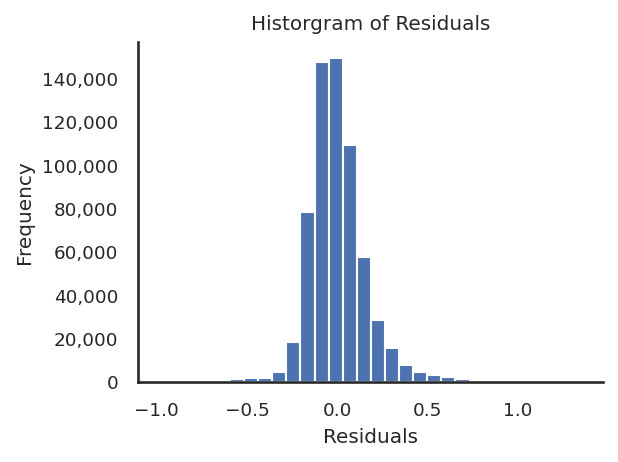

In [48]:
# Configure matplotlib
figure(figsize=(4, 3), dpi=150)
font = {'weight' : 'regular',
        'size'   : 10}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = True

# Plot
plt.hist(residuals_v1_2['residuals'], bins=30, color=None)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Historgram of Residuals')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Model v2.2

In [41]:
selected_features = ['name_Shared',
 'name_LuxBlackXL',
 'name_Lux',
 'log_distance',
 'name_LuxBlack',
 'name_Lyft',
 'name_LyftXL',
 'short_summary_MostlyCloudy',
 'hour_13',
 'hour_18',
 'hour_20']

target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_lyft_rides_log_price_distance).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.486e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:20:43   Log-Likelihood:                 94051.
No. Observations:              307408   AIC:                        -1.881e+05
Df Residuals:                  307397   BIC:                        -1.880e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [42]:
residuals_v2_2 = cab_data_lyft_rides_log_price_distance[['log_price']]
residuals_v2_2['pred_price'] = model.predict(cab_data_lyft_rides_log_price_distance)
residuals_v2_2['residuals'] = model.resid

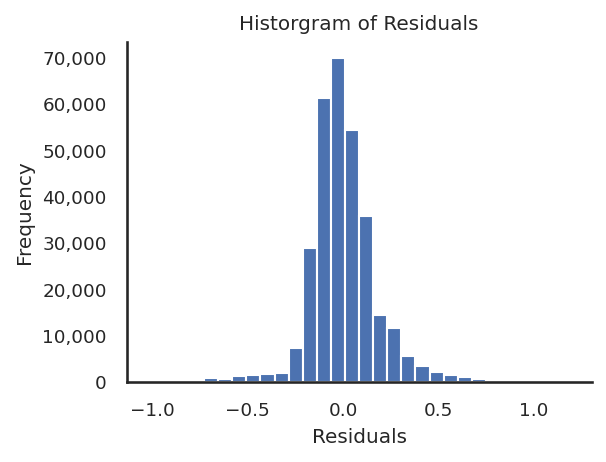

In [49]:
# Configure matplotlib
figure(figsize=(4, 3), dpi=150)
font = {'weight' : 'regular',
        'size'   : 10}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = True

# Plot
plt.hist(residuals_v2_2['residuals'], bins=30, color=None)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Historgram of Residuals')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Model v3.2

In [44]:
selected_features = ['name_UberPool',
 'name_BlackSUV',
 'name_UberXL',
 'name_WAV',
 'name_UberX',
 'log_distance',
 'hour_17',
 'hour_2',
 'temperatureMinTime',
 'cloudCover',
 'hour_1']

target = 'log_price'
X_vars = selected_features
formula_ols = target + '~' + '+'.join(X_vars)
model = ols(formula=formula_ols,
            data=cab_data_uber_rides_log_price_distance).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.380e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:21:11   Log-Likelihood:             1.6846e+05
No. Observations:              330568   AIC:                        -3.369e+05
Df Residuals:                  330556   BIC:                        -3.368e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8228      0

In [45]:
residuals_v3_2 = cab_data_uber_rides_log_price_distance[['log_price']]
residuals_v3_2['pred_price'] = model.predict(cab_data_uber_rides_log_price_distance)
residuals_v3_2['residuals'] = model.resid

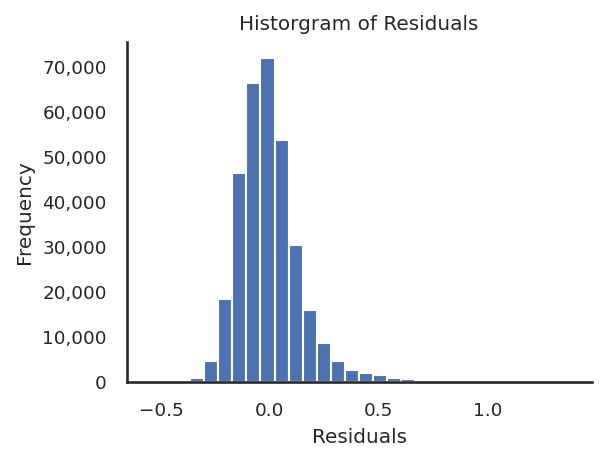

In [50]:
# Configure matplotlib
figure(figsize=(4, 3), dpi=150)
font = {'weight' : 'regular',
        'size'   : 10}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = True

# Plot
plt.hist(residuals_v3_2['residuals'], bins=30, color=None)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Historgram of Residuals')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()